In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [2]:
train_data = pd.read_csv(os.path.join("data", "train.csv"), header=0).set_index("PassengerId")
test_data = pd.read_csv(os.path.join("data", "test.csv"), header=0).set_index("PassengerId")

In [3]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

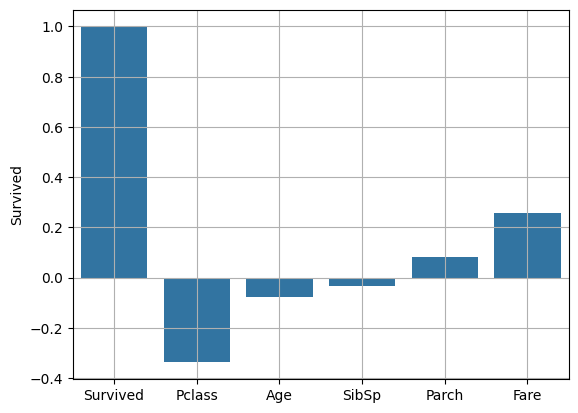

In [4]:
sns.barplot(train_data.corr(numeric_only=True)["Survived"])
plt.grid()

#### Survived, Pclass Age SibSp, Parch, Fareは数字データ
#### Name, Sex, Ticket, Cabin, Embarkedはほかのデータ型

In [5]:
train_data["Sex"]

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object

In [6]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
train_data["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

# CabinはU(unknown)でfillnaしました

<Axes: xlabel='Cabin', ylabel='Survived'>

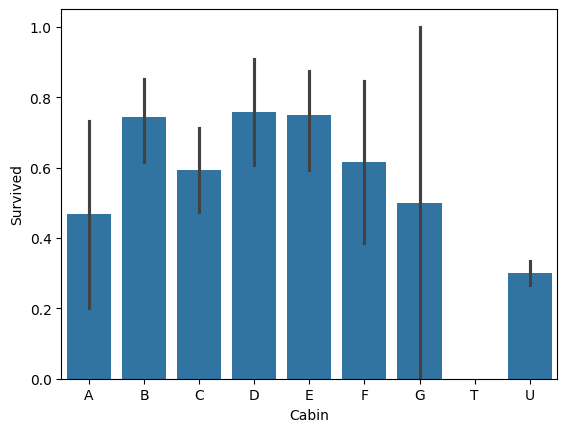

In [8]:
train_data["Cabin"] = train_data["Cabin"].str.get(0)
train_data["Cabin"] = train_data["Cabin"].fillna("U")

test_data["Cabin"] = test_data["Cabin"].str.get(0)
test_data["Cabin"] = test_data["Cabin"].fillna("U")

sns.barplot(train_data.sort_values("Cabin"), x="Cabin", y="Survived")

## Age自体をfillnaするためのモデルを作りたい

<Axes: xlabel='Age', ylabel='Survived'>

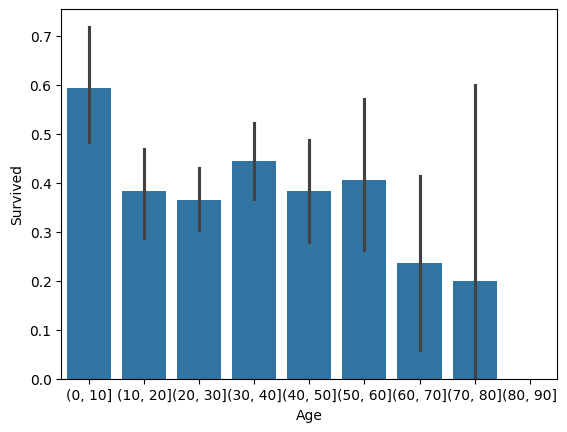

In [9]:
sns.barplot(x=pd.cut(train_data["Age"], bins=np.arange(0, 100, 10)), y=train_data["Survived"])

In [10]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,S


# NameをMrやMrsで位を分けるようにする、SibSp, Parch, Fare, TicketがどのようにSurvivedに関連付くかを調べる

## とりあえずLogisticRegression()で推論を行ってみる。その後にRandomForestを使ってみる、その際にはone-hot vectorをしないようにする

In [11]:
train_data["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='Survived'>

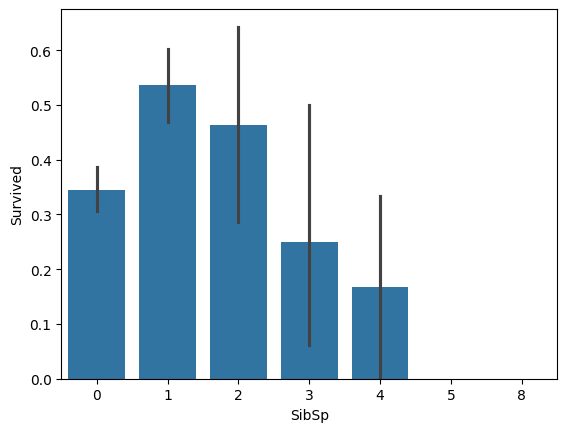

In [12]:
sns.barplot(data=train_data, x="SibSp", y="Survived")

<Axes: xlabel='Parch', ylabel='Survived'>

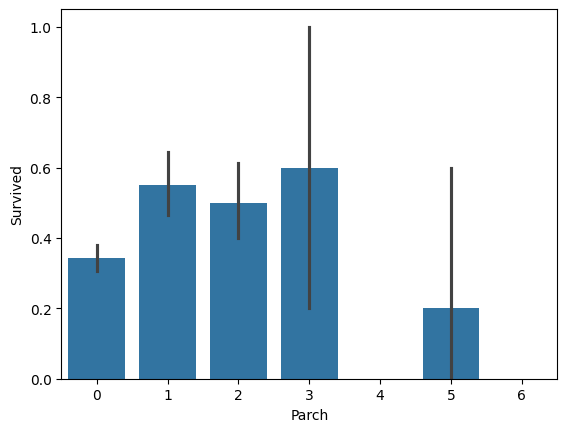

In [13]:
sns.barplot(data=train_data, x="Parch", y="Survived")

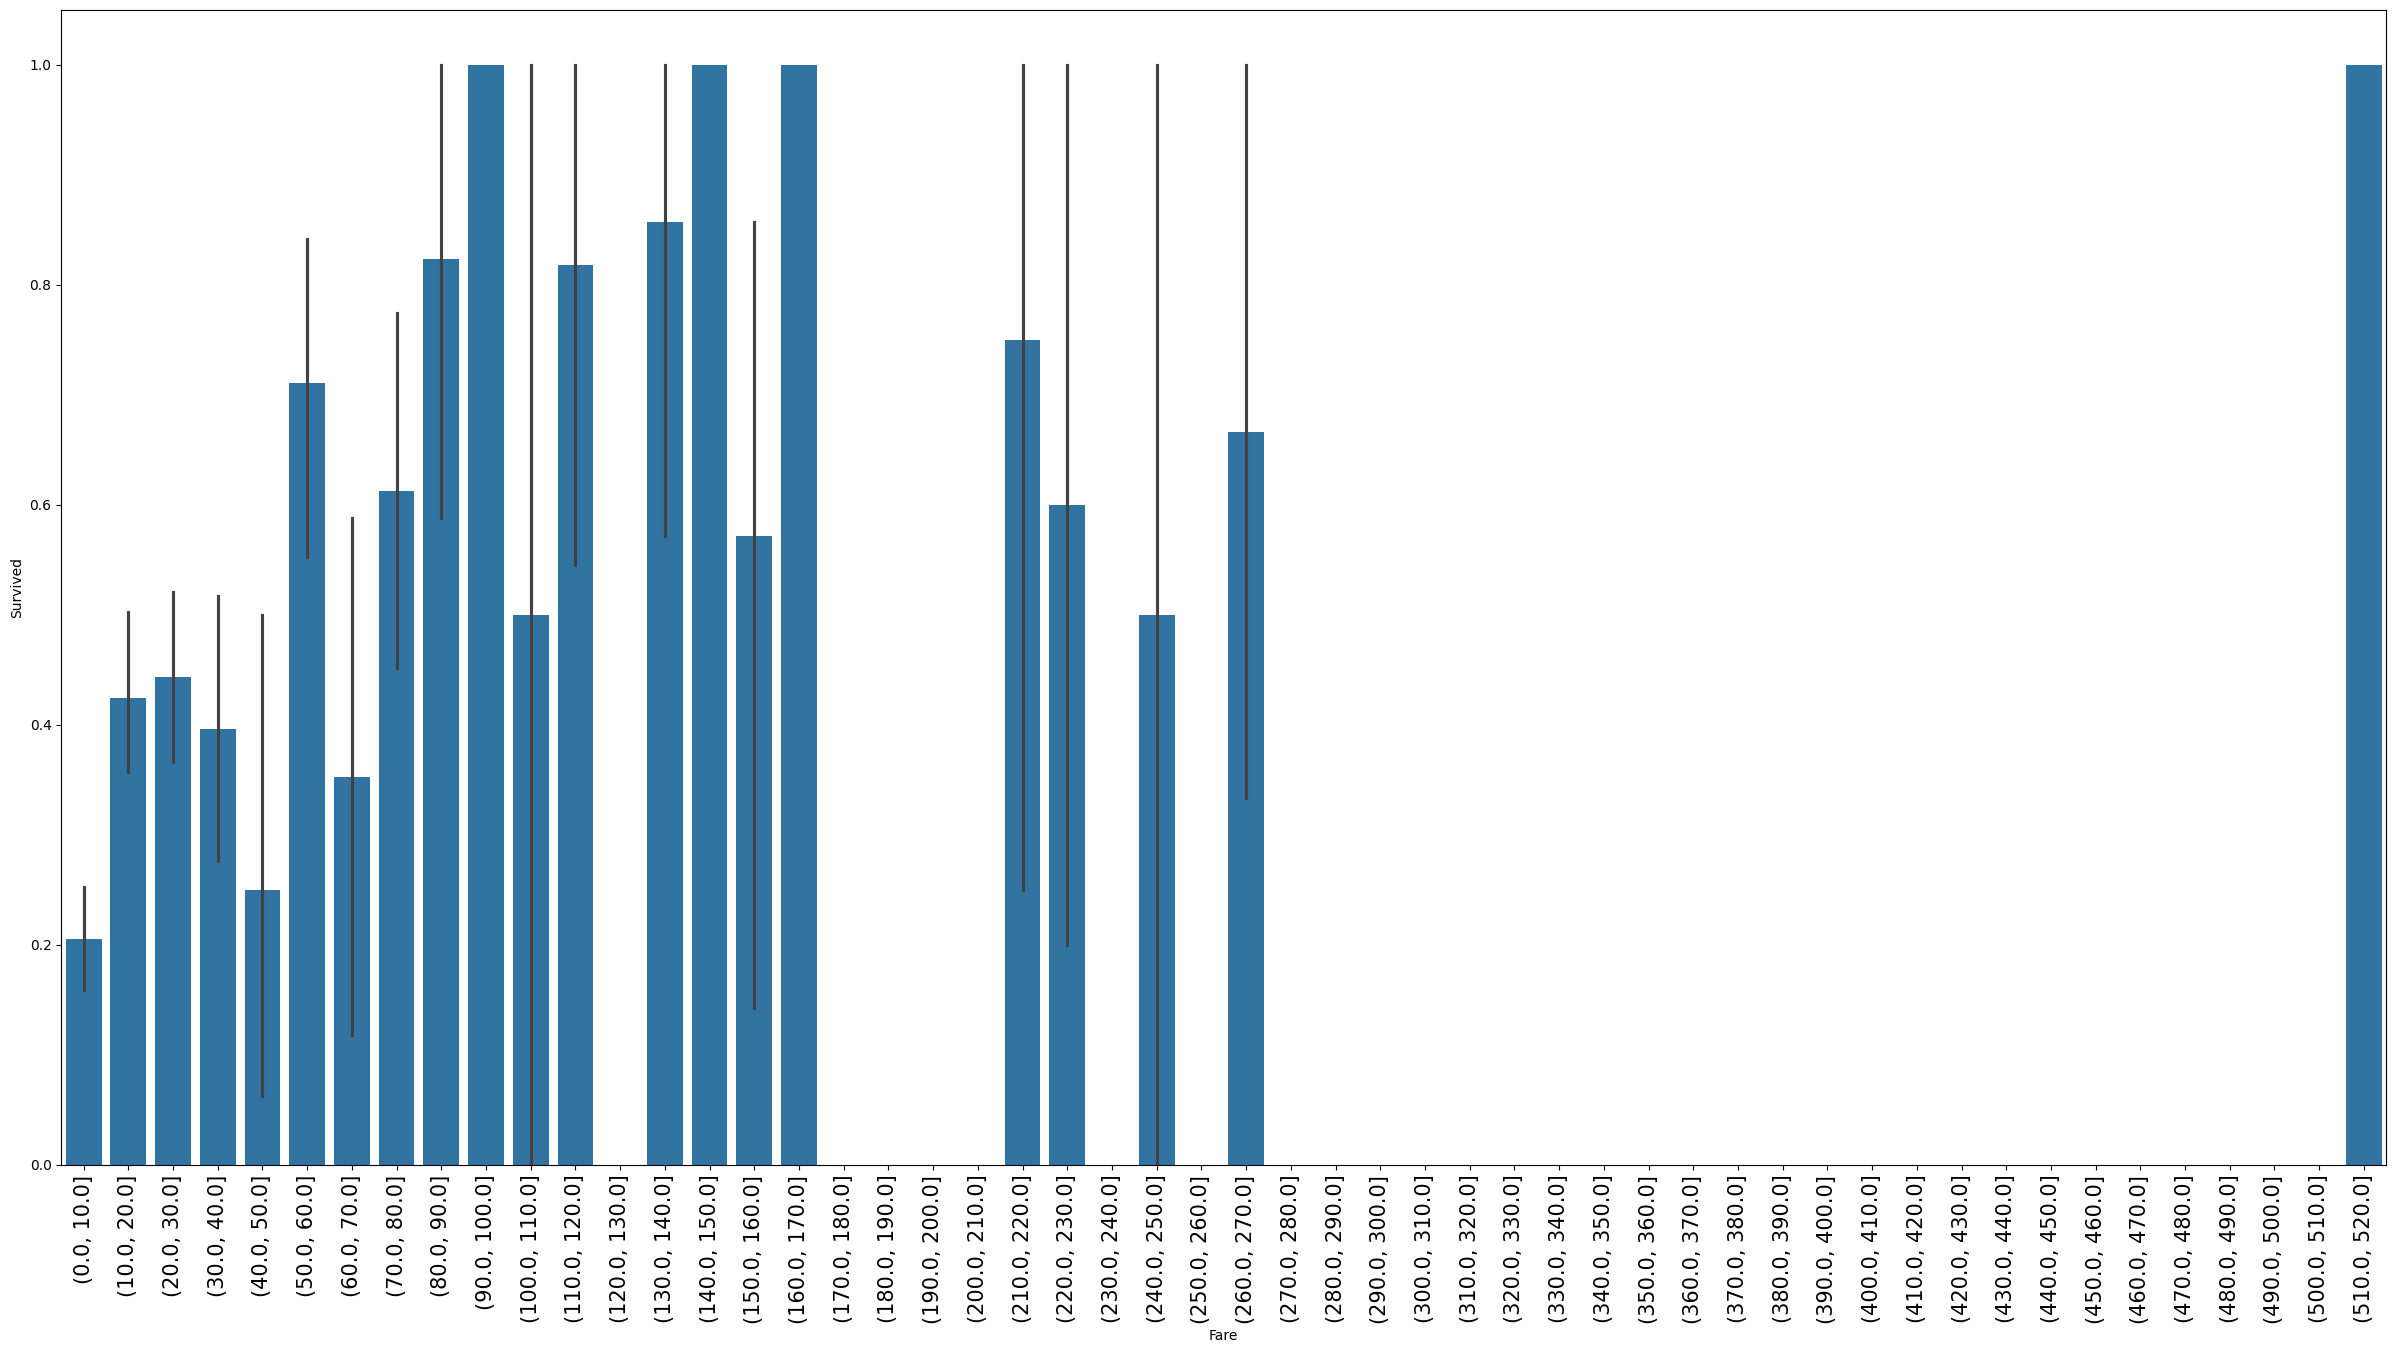

In [14]:
plt.figure(figsize=(30, 15))
sns.barplot(x=pd.cut(train_data["Fare"], bins=np.arange(0, (np.max(train_data["Fare"] + 10)), 10)), y=train_data["Survived"])
plt.xticks(rotation=90, fontsize=15)
plt.show()

X_train, y_train = train_data.drop(["Name", "Survived", "Ticket"], axis=1), train_data["Survived"]

X_train["Age"] = X_train["Age"].fillna(X_train["Age"].mean())

print(X_train.isna().sum())

print(y_train.isna().sum())

param_grid = {"logisticregression__C": 10.0 ** np.arange(-3, 5),}

grid_logreg = GridSearchCV(pipe_logreg, param_grid=param_grid, cv=10)

grid_logreg.fit(X_train, y_train)


print("Best cross-validation score", grid_logreg.best_score_)
print("Best param", grid_logreg.best_params_)

### Best cross-validation score 0.8058551810237203
### Best param {'logisticregression__C': np.float64(10.0)}

In [15]:
train_data["Age"].notna().sum()

np.int64(714)

In [16]:
train_data["Age"].isna()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [17]:
test_data["Age"].isna().sum()

np.int64(86)

In [18]:
train_data["Honorifics"] = train_data["Name"].str.extract(r",\s*([A-Za-z]+)\.")
test_data["Honorifics"] = test_data["Name"].str.extract(r",\s*([A-Za-z]+)\.")

hono_dict = {}
hono_dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
hono_dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
hono_dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
hono_dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
hono_dict.update(dict.fromkeys(['Mr'], 'Mr'))
hono_dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))

train_data["Honorifics"] = train_data["Honorifics"].map(hono_dict)
test_data["Honorifics"] = test_data["Honorifics"].map(hono_dict)

In [19]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S,Officer
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,S,Miss


In [20]:
pd.concat([train_data, test_data])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,U,S,Mr
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Royalty
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,U,S,Mr


In [22]:
test_data["Fare"] = test_data["Fare"].fillna(pd.concat([train_data, test_data])["Fare"].mean())
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,U,S,Mr
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,C,Royalty
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,U,S,Mr


### Sex, Cabin, Embarked, Pclass, Honorificsをone-hot vector化

In [24]:
train_data = pd.get_dummies(train_data, columns=["Sex", "Cabin", "Embarked", "Honorifics"]).drop("Cabin_T", axis=1)
test_data = pd.get_dummies(test_data, columns=["Sex", "Cabin", "Embarked", "Honorifics"])

#### Age列のnaでない列をnona_Ageに

# Ageを求めるモデルを作る

In [29]:
train_age_na_idx = train_data["Age"].isna()
test_age_na_idx = test_data["Age"].isna()


train_nona_Age = train_data[train_data["Age"].notna()]
test_nona_Age = test_data[test_data["Age"].notna()]
nona_Age = pd.concat([train_nona_Age, test_nona_Age], ignore_index=True).drop(["Survived"], axis=1)

X_age_train, y_age_train = nona_Age.drop(["Name", "Ticket", "Age"], axis=1), nona_Age["Age"]

In [30]:
nona_Age.isna().sum()

Pclass                0
Name                  0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Sex_female            0
Sex_male              0
Cabin_A               0
Cabin_B               0
Cabin_C               0
Cabin_D               0
Cabin_E               0
Cabin_F               0
Cabin_G               0
Cabin_U               0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Honorifics_Master     0
Honorifics_Miss       0
Honorifics_Mr         0
Honorifics_Mrs        0
Honorifics_Officer    0
Honorifics_Royalty    0
dtype: int64

In [31]:
pipe_logreg = make_pipeline(
    StandardScaler(),
    SVR()
)

param_grid = {"svr__C": [5, 10, 15],
              "svr__gamma": [0.05, 0.1, 0.15]}

grid_logreg = GridSearchCV(pipe_logreg, param_grid, cv=10)
grid_logreg.fit(X_age_train, y_age_train)

print(grid_logreg.best_score_)
print(grid_logreg.best_params_)

0.36737122115222837
{'svr__C': 10, 'svr__gamma': 0.05}


In [32]:
pipe_age_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("rfr", RandomForestRegressor(random_state=42))
])

param_grid_rf = {"rfr__n_estimators": [600, 700, 800, 1000],
                 "rfr__max_depth": [5, 6, 7, 8],
                 "rfr__min_samples_leaf": [4, 5, 6, 7, 8],
                 "rfr__max_features": [0.4, 0.5, 0.6]}

grid_age_rf = GridSearchCV(pipe_age_rf, param_grid_rf, cv=10, n_jobs=-1)
grid_age_rf.fit(X_age_train, y_age_train)

print(grid_age_rf.best_score_)
print(grid_age_rf.best_params_)

0.444053254077895
{'rfr__max_depth': 8, 'rfr__max_features': 0.5, 'rfr__min_samples_leaf': 4, 'rfr__n_estimators': 800}


In [33]:
train_data[train_age_na_idx]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Honorifics_Master,Honorifics_Miss,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,False,True,...,True,False,True,False,False,False,True,False,False,False
18,1,2,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,False,True,...,True,False,False,True,False,False,True,False,False,False
20,1,3,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,True,False,...,True,True,False,False,False,False,False,True,False,False
27,0,3,"Emir, Mr. Farred Chehab",NaN,0,0,2631,7.2250,False,True,...,True,True,False,False,False,False,True,False,False,False
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,True,False,...,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",NaN,0,0,2629,7.2292,False,True,...,True,True,False,False,False,False,True,False,False,False
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,8,2,CA. 2343,69.5500,True,False,...,True,False,False,True,False,True,False,False,False,False
869,0,3,"van Melkebeke, Mr. Philemon",NaN,0,0,345777,9.5000,False,True,...,True,False,False,True,False,False,True,False,False,False


In [35]:
test_data[test_age_na_idx]

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Cabin_A,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Honorifics_Master,Honorifics_Miss,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",NaN,0,0,349220,7.8958,False,True,False,...,True,False,False,True,False,False,True,False,False,False
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",NaN,0,0,PC 17598,31.6833,True,False,False,...,True,False,False,True,False,False,False,True,False,False
921,3,"Samaan, Mr. Elias",NaN,2,0,2662,21.6792,False,True,False,...,True,True,False,False,False,False,True,False,False,False
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",NaN,1,2,W./C. 6607,23.4500,True,False,False,...,True,False,False,True,False,False,False,True,False,False
928,3,"Roth, Miss. Sarah A",NaN,0,0,342712,8.0500,True,False,False,...,True,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,"Riordan, Miss. Johanna Hannah""""",NaN,0,0,334915,7.7208,True,False,False,...,True,False,True,False,False,True,False,False,False,False
1302,3,"Naughton, Miss. Hannah",NaN,0,0,365237,7.7500,True,False,False,...,True,False,True,False,False,True,False,False,False,False
1305,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,False,True,False,...,True,False,False,True,False,False,True,False,False,False


In [37]:
train_data.loc[train_age_na_idx, "Age"] = grid_age_rf.predict(train_data[train_age_na_idx].drop(["Survived", "Name", "Ticket", "Age"], axis=1))
test_data.loc[test_age_na_idx, "Age"] = grid_age_rf.predict(test_data[test_age_na_idx].drop(["Name", "Ticket", "Age"], axis=1))

In [38]:
train_data[train_age_na_idx]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Honorifics_Master,Honorifics_Miss,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",32.568001,0,0,330877,8.4583,False,True,...,True,False,True,False,False,False,True,False,False,False
18,1,2,"Williams, Mr. Charles Eugene",32.846003,0,0,244373,13.0000,False,True,...,True,False,False,True,False,False,True,False,False,False
20,1,3,"Masselmani, Mrs. Fatima",31.231585,0,0,2649,7.2250,True,False,...,True,True,False,False,False,False,False,True,False,False
27,0,3,"Emir, Mr. Farred Chehab",27.629060,0,0,2631,7.2250,False,True,...,True,True,False,False,False,False,True,False,False,False
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",23.096747,0,0,330959,7.8792,True,False,...,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",27.496576,0,0,2629,7.2292,False,True,...,True,True,False,False,False,False,True,False,False,False
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",13.362327,8,2,CA. 2343,69.5500,True,False,...,True,False,False,True,False,True,False,False,False,False
869,0,3,"van Melkebeke, Mr. Philemon",27.724593,0,0,345777,9.5000,False,True,...,True,False,False,True,False,False,True,False,False,False


In [40]:
test_data[test_age_na_idx]

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Cabin_A,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Honorifics_Master,Honorifics_Miss,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",27.979194,0,0,349220,7.8958,False,True,False,...,True,False,False,True,False,False,True,False,False,False
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",46.423347,0,0,PC 17598,31.6833,True,False,False,...,True,False,False,True,False,False,False,True,False,False
921,3,"Samaan, Mr. Elias",25.233360,2,0,2662,21.6792,False,True,False,...,True,True,False,False,False,False,True,False,False,False
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",32.543757,1,2,W./C. 6607,23.4500,True,False,False,...,True,False,False,True,False,False,False,True,False,False
928,3,"Roth, Miss. Sarah A",23.533243,0,0,342712,8.0500,True,False,False,...,True,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,"Riordan, Miss. Johanna Hannah""""",22.284981,0,0,334915,7.7208,True,False,False,...,True,False,True,False,False,True,False,False,False,False
1302,3,"Naughton, Miss. Hannah",24.071056,0,0,365237,7.7500,True,False,False,...,True,False,True,False,False,True,False,False,False,False
1305,3,"Spector, Mr. Woolf",28.080232,0,0,A.5. 3236,8.0500,False,True,False,...,True,False,False,True,False,False,True,False,False,False


# Survivedを求めるモデルを作る

In [41]:
X_train, y_train = train_data.drop(["Survived", "Name", "Ticket"], axis=1), train_data["Survived"]

In [ ]:
pipe_rf = Pipeline([
    ("scaler", StandardScaler()),
    ("rfc", RandomForestClassifier(random_state=42))
])

param_grid_rf = {"rfc__n_estimators": [100, 200, 400, 800, 1000],
                 "rfc__max_depth": [1, 2, 4, 8, 16],
                 "rfc__min_samples_split": [2, 3, 4, 5],
                 "rfc__max_features": [0.2, 0.4, 0.6, 0.8, 1.0]}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=10, n_jobs=-1)
grid_rf.fit(X_train, y_train)


print(grid_rf.best_score_)
print(grid_rf.best_params_)

# testについて行う

In [ ]:
pred = grid_rf.predict(test_data)